<a href="https://colab.research.google.com/github/RamilyaKo/-RamilyaKo-s-Repository/blob/main/%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D1%8B%D0%B9_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header=None, encoding="utf8")
 
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
 
# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

In [ ]:
class AdalineGD(object):
    """
    ADAptive LInear NEuron classifier.
 
    ------------
         eta: float #learning rate
      Learning rate (between 0.0 and 1.0)
         n_iter: int # количество итераций
      Passes over the training dataset.
         random_state: int # Параметры генератора случайных чисел
      Random number generator seed for random weight initialization.
 
 
    Attributes
    -----------
         w_: 1d-массив # вес
      Weights after fitting.
         cost_: list #square error
      Sum-of-squares cost function value in each epoch.
 
    """
         # Инициализация параметра
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
         # Подобрать данные, обновить веса, рассчитать частоту ошибок
    
   
    def fit(self,X,y):
        '''
         """ Fit training data.
 
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
          
                 X: набор входных данных, который необходимо подогнать, имеется n_sample образцов, и каждый образец имеет n_feature значений характеристик
                 Например, X = ([1,2,3], [4,5,6]) [1,2,3] - категория +1, [4,5,6] - категория -1.
        
        y : array-like, shape = [n_samples]
          Target values.
                 y: классификация выходных данных, {+1, -1}
        
        Returns
        -------
        self : object
 
        """
        '''
        rgen = np.random.RandomState(self.random_state)
                 # Объедините смещение b в матрицу w, чтобы размер был равен X строкам плюс 1 X.shape [1] представляет количество строк, то есть количество выборок
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1+ X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
                         # В этом коде функцию активации можно не указывать, она написана только для универсальности кода
                         # Например, логистический код можно изменить на функцию sigmod
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * (X.T).dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2) .sum ()/2 
            self.cost_.append(cost)
        return self
        
                 # Чистый ввод X точек, умноженных на W
    def net_input(self, X):
        return np.dot(X,self.w_[1:]) + self.w_[0]
        
                 # Активация не имеет значения в этом коде, поэтому в будущем ее можно будет использовать в логистике.
    def activation(self, X):
        return X
        
                 # Функция предсказания
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0,1,-1  )

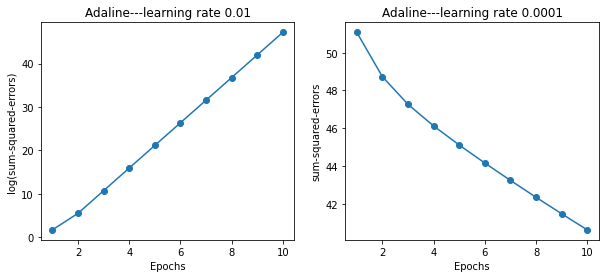

In [ ]:
# Различная эта соответствует сходимости разных итераций
fig, ax = plt.subplots(nrows = 1,ncols = 2,figsize = (10,4))
 
ada1 = AdalineGD(n_iter = 10, eta = 0.1).fit(X,y)
#ax[0].plot(range(1, len(ada1.cost_) + 1),np.log10(ada1.cost_),marker = 'o')
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("log(sum-squared-errors)")
ax[0].set_title("Adaline---learning rate 0.01")
 
ada2 = AdalineGD(n_iter = 10, eta = 0.0001).fit(X,y)
ax[1].plot(range(1, len(ada2.cost_) + 1),ada2.cost_, marker = 'o')
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("sum-squared-errors")
ax[1].set_title("Adaline---learning rate 0.0001")
 
plt.show()

In [ ]:
X_std = np.copy(X)
 # Провести стандартную нормализацию
X_std [:, 0] = (X_std[:, 0] - X_std[:, 0].mean()) / X[:, 0].std()
X_std [:, 1] = (X_std[:, 1] - X_std[:, 1].mean()) / X[:, 1].std()

In [ ]:
from matplotlib.colors import ListedColormap
#      
def plot_decision_regions(X, y, classifier, resolution=0.02):
         #Specific function В сообщении блога есть запись (1). Адрес сообщения блога http://blog.csdn.net/Amy_mm/article/details/79625288
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
         # построить поверхность принятия решения Рисуем гиперплоскость разделения
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
         # Создать сетку с интервалом разрешения
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
         # Вызов функции классификации перцептронов для предсказания
         # np.array ([xx1.ravel (), xx2.ravel ()]). T - матрица с * строками и двумя столбцами, соответствующими точкам сетки штриха xx1, xx2 на двумерной плоскости
         # Классифицируйте эти точки сетки как +1, -1,
         # Нарисуйте контурные линии, +1 шрифт нарисуйте один цвет, -1 другой
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
         #contour () функция (1) имеет запись
    plt.contourf(xx1,xx2,Z,alpha = 0.3,cmap = cmap)
    
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
         # plot class samples Нарисуйте точки выборки
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], 
                    y = X[y == cl, 1],
                    alpha = 0.8, 
                    c = colors[idx], 
                    marker = markers[idx],  
                    label = cl,
                    edgecolor = 'black')

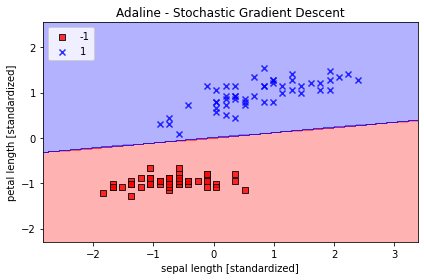

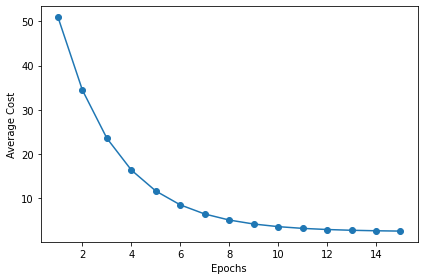

In [ ]:
ada = AdalineGD(n_iter = 15, eta = 0.01)
ada.fit(X_std,y)
plot_decision_regions(X_std,y,ada)
 
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
 
plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()
 
 
plt.plot(range(1,len(ada.cost_) + 1),ada.cost_,marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
#
plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()

In [ ]:
class AdalineSGD(object):
    
    def __init__(self, n_iter = 10, eta = 0.1, shuffle = True, random_state = None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
    
    def fit (self,X,y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self
    # If we want to update our model, for example, in an online learning scenario with
    # streaming data, we could simply call the partial_fit method on individual
    # samples—for instance ada.partial_fit(X_std[0, :], y[0]) 
    def partial_fit (self,X,y):
        #
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1 :
            for xi, y in zip(X,y):
                self._update_weights(xi,targey)
        else:
            self._update_weights(X, y)
        return self
        
    def _shuffle(self, X, y):
        # permutation (x) ---> If x is an integer, randomly permute np.arange(x).
        r = self.rgen.permutation(len(y)) 
        #print('X[r]',X[r],'Y[r]',y[r])
        return X[r], y[r]
    
    def _initialize_weights(self, m):
                 # Инициализировать вес, чтобы уменьшить w
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc = 0.0, scale = 0.01, size = m + 1)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
                 # Использование линейных нейронов для обновления w
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = error ** 2 / 2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
 
    def activation(self,X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
       
 

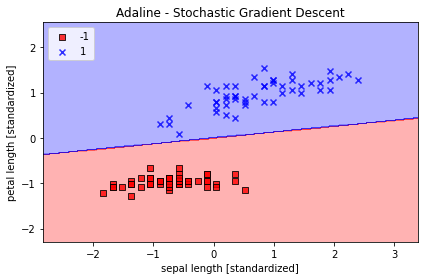

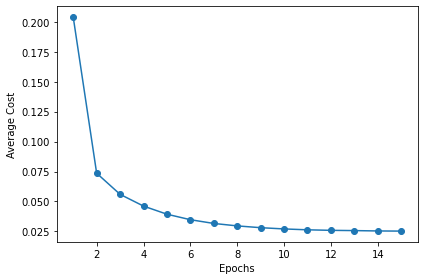

In [ ]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)
 
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
 
plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()
 
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
 
plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()